Dataset imported from http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

Dataset Description 1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

#### importing 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

#### reading data set

In [3]:
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")

####  displaying data set features

In [4]:
dataset.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
dataset=dataset.shift(1)
dataset.iloc[0]=dataset.columns

In [6]:
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [7]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (568, 32)


In [8]:
headerList = ['id', 'diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension',
              'SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension',
              'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']
# converting data frame to csv
dataset.to_csv("cancer.csv", header=headerList, index=False)

#### splitting data set (dependent & independendent)

In [9]:
dataset = pd.read_csv('cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [10]:
dataset.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
dataset.shape

(568, 32)

#### printing diagnosis information

In [12]:
dataset['diagnosis'].describe()

count     568
unique      2
top         B
freq      356
Name: diagnosis, dtype: object

####  benign entries are 357 and malign are hence 211 (568-357)

#### visualizing the data

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

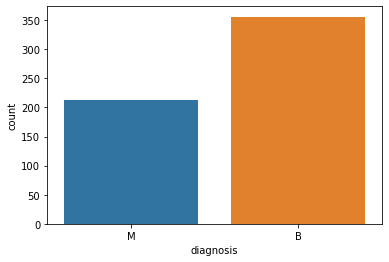

In [13]:
sns.countplot(x=dataset['diagnosis'], data=dataset)

In [12]:
lis1=headerList[2:]
lis1

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave points',
 'mean_symmetry',
 'mean_fractal dimension',
 'SE_radius',
 'SE_texture',
 'SE_perimeter',
 'SE_area',
 'SE_smoothness',
 'SE_compactness',
 'SE_concavity',
 'SE_concave points',
 'SE_symmetry',
 'SE_fractal dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave points',
 'worst_symmetry',
 'worst_fractal dimension']

#### correlation

In [13]:
cor=dataset.corr()
cor

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
id,1.000000,0.074072,0.100429,0.072600,0.096477,-0.014421,-0.000396,0.049661,0.043683,-0.022479,...,0.081951,0.065083,0.079522,0.106842,0.009574,-0.003488,0.022681,0.034523,-0.044247,-0.030203
mean_radius,0.074072,1.000000,0.329052,0.997843,0.987489,0.162529,0.504501,0.675900,0.822031,0.145636,...,0.969538,0.300461,0.965098,0.941328,0.114375,0.411331,0.525054,0.742788,0.164274,0.004690
mean_texture,0.100429,0.329052,1.000000,0.334847,0.324931,-0.016861,0.239772,0.305552,0.296985,0.073305,...,0.356702,0.912068,0.362252,0.346669,0.081859,0.281157,0.304692,0.300269,0.105250,0.121040
mean_perimeter,0.072600,0.997843,0.334847,1.000000,0.986639,0.199621,0.555519,0.715432,0.850604,0.181040,...,0.969478,0.306526,0.970376,0.941804,0.145475,0.453815,0.562182,0.769962,0.189512,0.048785
mean_area,0.096477,0.987489,0.324931,0.986639,1.000000,0.171383,0.497146,0.685183,0.822744,0.149675,...,0.962624,0.289915,0.958986,0.959172,0.119667,0.388665,0.511092,0.720962,0.143686,0.001959
mean_smoothness,-0.014421,0.162529,-0.016861,0.199621,0.171383,1.000000,0.659225,0.520901,0.552278,0.558391,...,0.207528,0.040627,0.233420,0.202765,0.804457,0.470480,0.432114,0.499094,0.397450,0.499725
mean_compactness,-0.000396,0.504501,0.239772,0.555519,0.497146,0.659225,1.000000,0.882857,0.830711,0.602038,...,0.534015,0.250101,0.589059,0.508535,0.564150,0.865482,0.815805,0.815174,0.510723,0.687003
mean_concavity,0.049661,0.675900,0.305552,0.715432,0.685183,0.520901,0.882857,1.000000,0.921213,0.499900,...,0.687424,0.301864,0.728867,0.675303,0.447023,0.754392,0.883833,0.861150,0.409819,0.514274
mean_concave points,0.043683,0.822031,0.296985,0.850604,0.822744,0.552278,0.830711,0.921213,1.000000,0.461596,...,0.829800,0.295015,0.855485,0.809198,0.450626,0.666561,0.751680,0.909994,0.376166,0.367690
mean_symmetry,-0.022479,0.145636,0.073305,0.181040,0.149675,0.558391,0.602038,0.499900,0.461596,1.000000,...,0.184122,0.091856,0.217622,0.175924,0.425539,0.472343,0.432742,0.429183,0.700172,0.437806


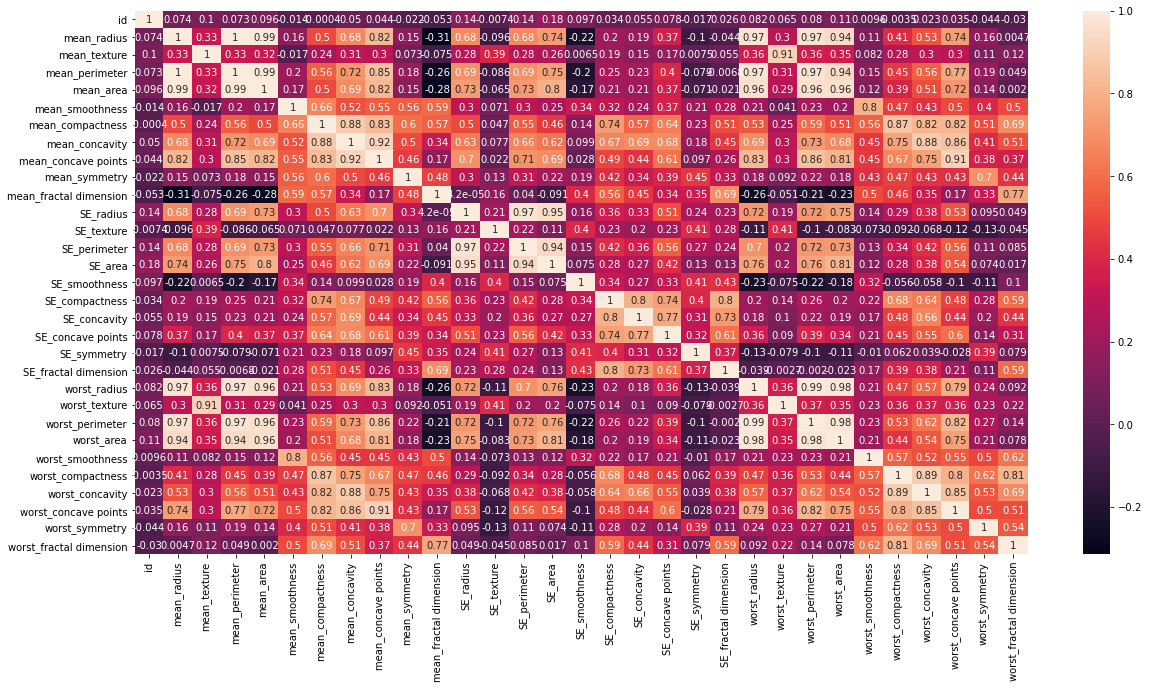

In [14]:
fig=plt.figure(figsize=(20,10))
b=sns.heatmap(cor,annot=True)

#### saving plots to PC

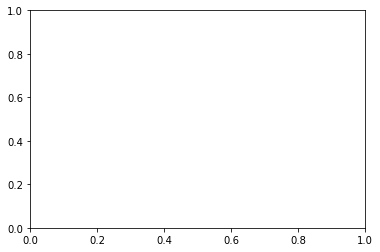

In [79]:
for name in lis1:
    plotdata=dataset[name]
    a=plotdata.plot(kind="hist");
    a.figure.savefig(r'C:\Users\ria\Downloads\mini\graph_images\ '+name)
    a.clear()

In [80]:
images=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

##### displaying saved plots

<B>mean value graphs</B>

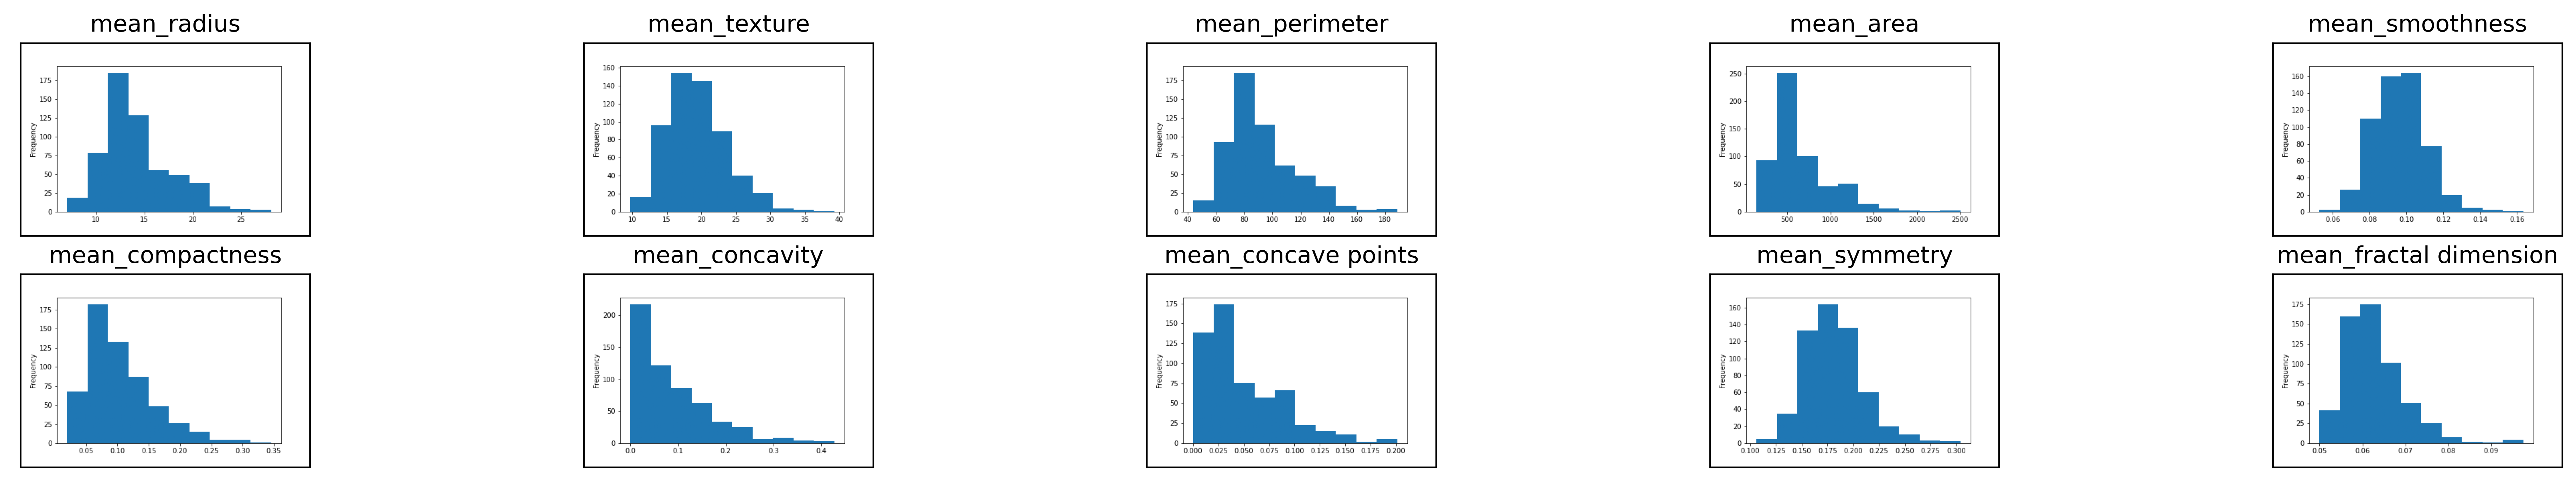

In [81]:
i=0
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\ria\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

<B>se value graphs</B>

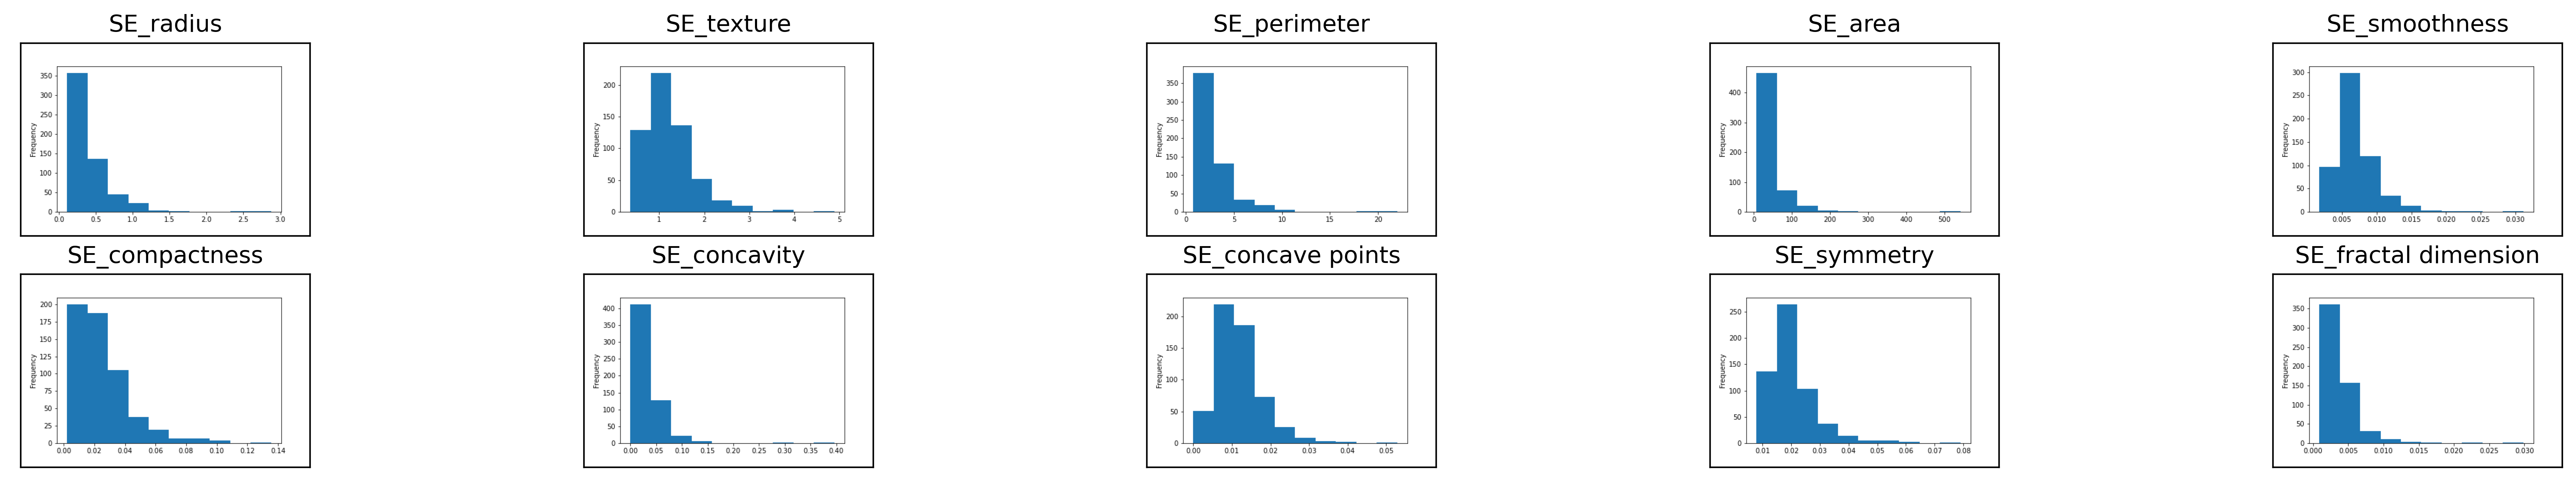

In [82]:
i=10
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\ria\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

<B>worst value graphs</B>

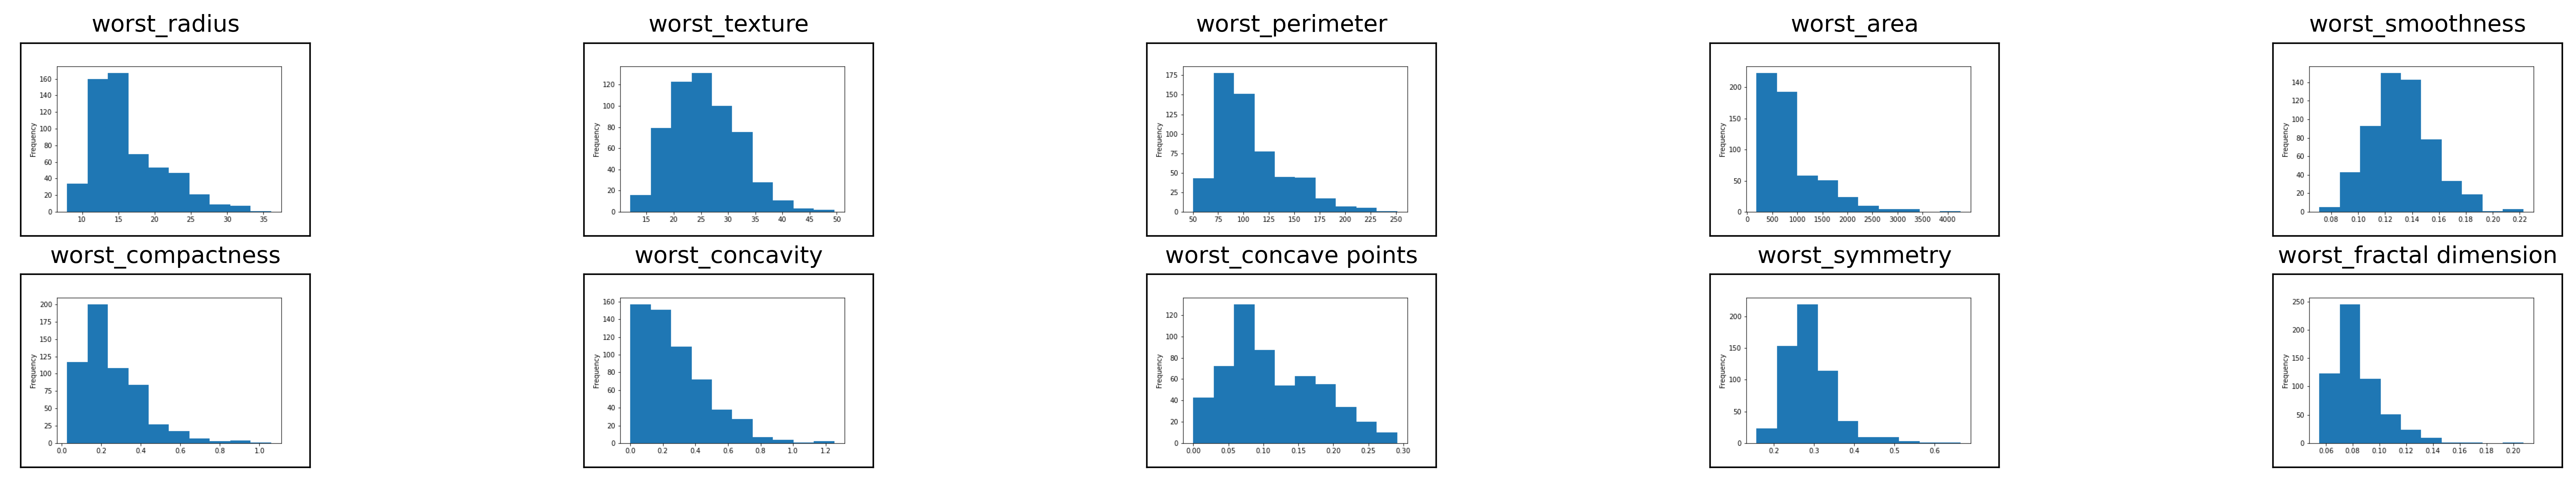

In [83]:
i=20
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\ria\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

Inference: The dataset contains features highly varying in magnitudes, units and range and thus needs to be scaled accordingly. Also the data is skewed at times to the left or right and hence needs to be normalised too.

<B>missing/ null data points</B>

We can find any missing or null data points of the data set (if there is any) using the following pandas function.

In [15]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

Since there aren't any null values present in the dataset, we dont need to delete any rows.

##### Categorical Data to Numerical Data to ease the ML process

Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset['diagnosis'] = labelencoder_Y.fit_transform(dataset['diagnosis'])

In [17]:
dataset.tail()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
563,926125.0,1,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424.0,1,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682.0,1,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954.0,1,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
567,927241.0,1,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


Thus, we have converted the categorical diagnosis to numerical, with malign being 1.

<b>undersampling</b>

In [18]:
minority_len=len(dataset.loc[dataset['diagnosis']==1])
print(minority_len)


212


In [19]:
majority_indices=dataset[dataset['diagnosis']==0].index
print(majority_indices)


Int64Index([ 19,  20,  21,  37,  46,  48,  49,  50,  51,  52,
            ...
            552, 553, 554, 555, 556, 557, 558, 559, 560, 561],
           dtype='int64', length=356)


In [20]:
rand_majority_indices=np.random.choice(majority_indices, minority_len, replace=False)
print(len(rand_majority_indices))

212


In [21]:
minority_indices= dataset[dataset['diagnosis']==1].index
print(minority_indices)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            521, 533, 535, 536, 562, 563, 564, 565, 566, 567],
           dtype='int64', length=212)


#### data after undersampling

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

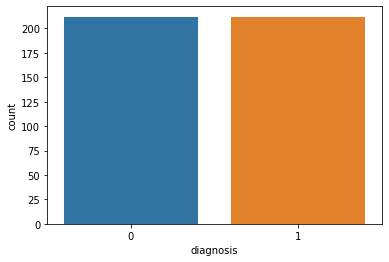

In [22]:
underSample_indices=np.concatenate([minority_indices, rand_majority_indices])
dataset=dataset.loc[underSample_indices]
sns.countplot(x=dataset['diagnosis'], data=dataset)
#X=underSample.loc[:, df.columns!=]
#Y=underSample.loc[:, df.columns==]

In [23]:
dataset.shape

(424, 32)

<B>splitting dataset</B>

In [24]:
X=dataset.drop(['diagnosis'],axis=1)
X.head()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
Y=dataset['diagnosis']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

<b>select independent variables wrt random forest feature importance (code not present here)</b>

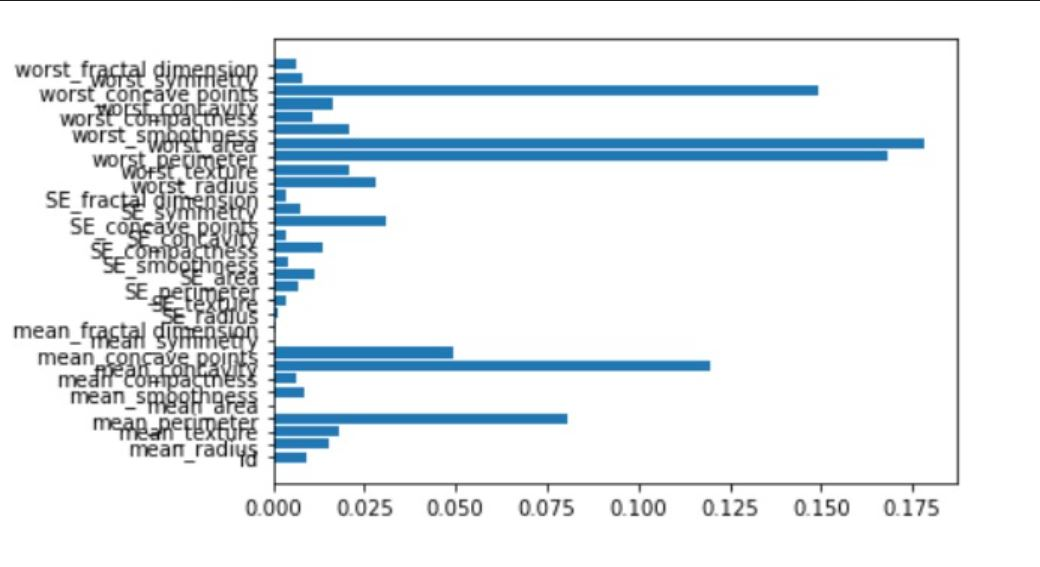

In [121]:
from IPython.display import Image
Image(filename=r'C:\Users\ria\Downloads\ml_proj\Features.jpg')

In [26]:
X=X.iloc[:,[21, 18,  8,  3,  7, 28, 23, 24]]

In [29]:
Frames=[X,Y]
result=pd.concat(Frames)

#### re-visit correlation

In [31]:
cor=result.corr()
cor

,0,SE_concave points,mean_concave points,mean_concavity,mean_perimeter,worst_area,worst_concave points,worst_perimeter,worst_radius
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SE_concave points,NaN,1.000000,0.639706,0.680721,0.472314,0.387425,0.630336,0.456380,0.415474
mean_concave points,NaN,0.639706,1.000000,0.930130,0.856743,0.799403,0.905104,0.854684,0.827181
mean_concavity,NaN,0.680721,0.930130,1.000000,0.735682,0.674830,0.865776,0.740481,0.696085
mean_perimeter,NaN,0.472314,0.856743,0.735682,1.000000,0.939030,0.766329,0.967874,0.966031
worst_area,NaN,0.387425,0.799403,0.674830,0.939030,1.000000,0.735248,0.976591,0.984024
worst_concave points,NaN,0.630336,0.905104,0.865776,0.766329,0.735248,1.000000,0.811907,0.782463
worst_perimeter,NaN,0.456380,0.854684,0.740481,0.967874,0.976591,0.811907,1.000000,0.993167
worst_radius,NaN,0.415474,0.827181,0.696085,0.966031,0.984024,0.782463,0.993167,1.000000


#### train-test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

<B>feature scaling</B>

We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that transforming the data so that it fits within a specific scale, like 0–100 or 0–1. We will use StandardScaler method from SciKit-Learn library.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Example of a single entry in the data thus produced

In [31]:
X_test[0]

array([ 0.05567053,  1.89277182,  1.65067891,  0.42529678,  2.21440147,
        1.29378076,  0.18101673, -0.09277175])

False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

Thus FN is of importance because if a breast cancer patient is shown as not having breast cancer it would be a potential threat to her life as compared to if a non breast cancer patient is shown as having breast cancer, in which case she could be sent for further testing.

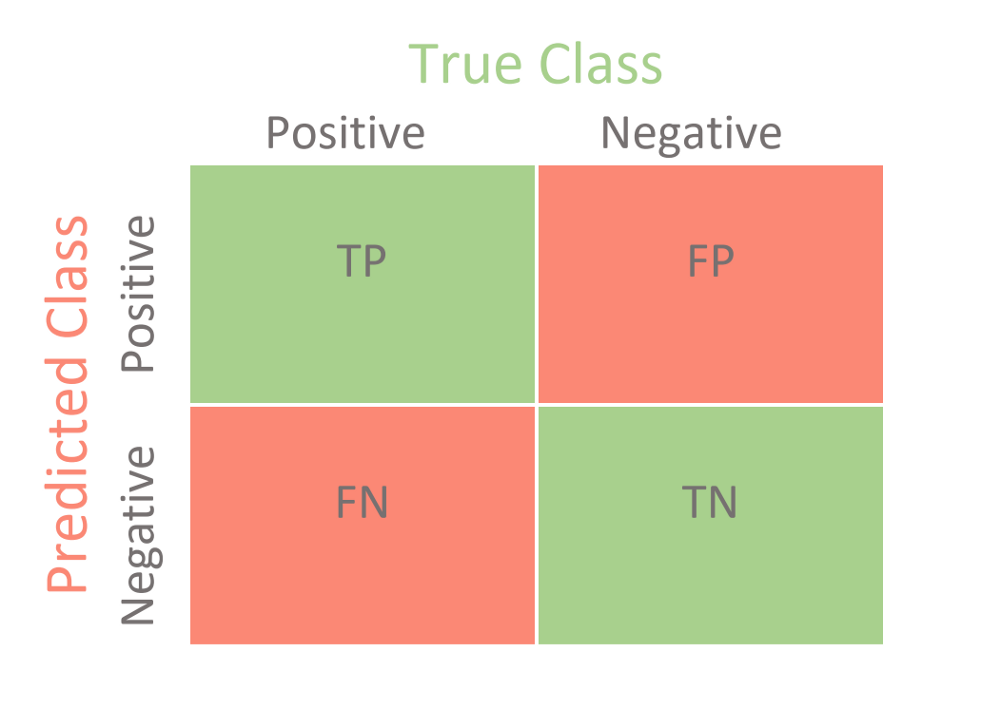

In [32]:
from IPython.display import Image
Image(filename=r'C:\Users\ria\Downloads\ml_proj\Confusion_matrix.png', width=300)

<B>Precision</B>: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).

<B>Recall</B>: It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).

<B>F1-score</B>: It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. It can be calculated as follows:

In [33]:
X

,worst_radius,SE_concave points,mean_concave points,mean_perimeter,mean_concavity,worst_concave points,worst_perimeter,worst_area
0,25.38,0.015870,0.14710,122.80,0.30010,0.26540,184.60,2019.0
1,24.99,0.013400,0.07017,132.90,0.08690,0.18600,158.80,1956.0
2,23.57,0.020580,0.12790,130.00,0.19740,0.24300,152.50,1709.0
3,14.91,0.018670,0.10520,77.58,0.24140,0.25750,98.87,567.7
4,22.54,0.018850,0.10430,135.10,0.19800,0.16250,152.20,1575.0
...,...,...,...,...,...,...,...,...
169,16.11,0.009073,0.03781,96.22,0.02602,0.08485,104.60,793.7
375,16.97,0.011960,0.05397,106.30,0.06651,0.12510,113.10,861.5
406,17.71,0.008747,0.04528,104.30,0.05500,0.11290,115.90,947.9
458,14.34,0.006336,0.01762,82.61,0.01206,0.05921,91.06,628.5


#### chi-square test

In [34]:
from bioinfokit.analys import stat, get_data

res = stat()
res.chisq(df=X)

print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson         2961       7498.28          0
Log-likelihood  2961       7443.25          0



In [35]:
print(res.expected_df)


Expected frequency counts

       worst_radius    SE_concave points    mean_concave points    mean_perimeter    mean_concavity    worst_concave points    worst_perimeter    worst_area
---  --------------  -------------------  ---------------------  ----------------  ----------------  ----------------------  -----------------  ------------
  0        33.3177            0.0239849               0.1094             186.562          0.200143                0.248078            220.614       1911.43
  1        32.1924            0.0231748               0.105705           180.261          0.193382                0.239699            213.162       1846.87
  2        28.5471            0.0205506               0.0937354          159.849          0.171485                0.212557            189.025       1637.74
  3        10.7591            0.00774532              0.035328            60.2456         0.064631                0.0801106            71.2416       617.249
  4        26.7012            0.0

## model selection

#### logistic regression algorithm 

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

predicting results on test data

In [37]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [39]:
cm

array([[41,  3],
       [ 5, 57]], dtype=int64)

results

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.92
Precision: 0.95
Recall: 0.92
F1-score: 0.93
Sensitivity:0.93
Specificity: 0.92


#### gaussianNB method of naïve_bayes 

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

predicting results on test data

In [42]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [44]:
cm

array([[41,  3],
       [ 4, 58]], dtype=int64)

results

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.95
Recall: 0.94
F1-score: 0.94
Sensitivity:0.93
Specificity: 0.94


#### decision tree classifier 

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting results on test data

In [47]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [49]:
cm

array([[39,  5],
       [ 4, 58]], dtype=int64)

results

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.92
Precision: 0.92
Recall: 0.94
F1-score: 0.93
Sensitivity:0.89
Specificity: 0.94


#### random forest classifier 



In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting results on test data

In [52]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [54]:
cm

array([[43,  1],
       [ 5, 57]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.94
Precision: 0.98
Recall: 0.92
F1-score: 0.95
Sensitivity:0.98
Specificity: 0.92


#### commented out feature selection using random forest

In [56]:
#classifier.feature_importances_

In [57]:
#Top 8 most important features

In [58]:
#n=8
#a=[np.argsort( classifier.feature_importances_)[-n:]]
#a

In [59]:
#X.iloc[:,[21, 18,  8,  3,  7, 28, 23, 24]]

In [60]:
#plt.barh(X.columns, classifier.feature_importances_)

#### kneighborsclassifier method 



In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

predicting results on test data

In [62]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [64]:
cm

array([[43,  1],
       [ 4, 58]], dtype=int64)

results

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.95
Precision: 0.98
Recall: 0.94
F1-score: 0.96
Sensitivity:0.98
Specificity: 0.94


#### SVC method

In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

predicting results on test data

In [67]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [69]:
cm

array([[42,  2],
       [ 5, 57]], dtype=int64)

results

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.97
Recall: 0.92
F1-score: 0.94
Sensitivity:0.95
Specificity: 0.92


#### SVC method of svm class (to use Kernel SVM Algorithm)

In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
classifier.fit(X_train, Y_train)

SVC(gamma='auto', random_state=0)

predicting results on test data

In [72]:
Y_pred = classifier.predict(X_test)

confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [74]:
cm

array([[43,  1],
       [ 5, 57]], dtype=int64)

results

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.94
Precision: 0.98
Recall: 0.92
F1-score: 0.95
Sensitivity:0.98
Specificity: 0.92


<b>ANN</b>

In [76]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [77]:
#creating model
classifier = Sequential()

In [78]:
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=8))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [79]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
#fitting the ANN to the training set
model = classifier.fit(X_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 905us/step - loss: 0.4432 - accuracy: 0.9308
Epoch 2/100
32/32 [==============================] - 0s 839us/step - loss: 0.3392 - accuracy: 0.9151
Epoch 3/100
32/32 [==============================] - 0s 996us/step - loss: 0.2755 - accuracy: 0.9088
Epoch 4/100
32/32 [==============================] - 0s 966us/step - loss: 0.2348 - accuracy: 0.9182
Epoch 5/100
32/32 [==============================] - 0s 933us/step - loss: 0.2077 - accuracy: 0.9214
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9214
Epoch 7/100
32/32 [==============================] - 0s 965us/step - loss: 0.1791 - accuracy: 0.9214
Epoch 8/100
32/32 [==============================] - 0s 932us/step - loss: 0.1701 - accuracy: 0.9245
Epoch 9/100
32/32 [==============================] - 0s 951us/step - loss: 0.1630 - accuracy: 0.9308
Epoch 10/100
32/32 [==============================] - 0s 965us/step - loss: 0.1581 - accuracy

predicting results on test data

In [81]:
Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred>0.5)
Y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

confusion matrix

In [82]:
cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[43  1]
 [ 4 58]]


results

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.95
Precision: 0.98
Recall: 0.94
F1-score: 0.96
Sensitivity:0.98
Specificity: 0.94


<b> XGBOOST </b>

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train)

[13:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
score = xgb_clf.score(X_test, Y_test)
print(score)

0.9339622641509434


predicting results on test data

In [88]:
Y_pred = xgb_clf.predict(X_test)
Y_pred = [round(value) for value in Y_pred]

confusion matrix

In [89]:
cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[43  1]
 [ 6 56]]


results

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.98
Recall: 0.90
F1-score: 0.94
Sensitivity:0.98
Specificity: 0.90
